In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [ ]:
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

calc_train = r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\train\cropped_files"
calc_test = r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files"

mass_train = r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass\train\cropped_files"
mass_test = r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass\test\cropped_files"

mass_train_csv = pd.read_csv(r"D:\VSC Workspace\breast_cancimg\csv\mass_case_description_train_set.csv")
mass_test_csv = pd.read_csv(r"D:\VSC Workspace\breast_cancimg\csv\mass_case_description_test_set.csv")

calc_train_csv = pd.read_csv(r"D:\VSC Workspace\breast_cancimg\csv\calc_case_description_train_set.csv")
calc_test_csv = pd.read_csv(r"D:\VSC Workspace\breast_cancimg\csv\calc_case_description_test_set.csv")

[]

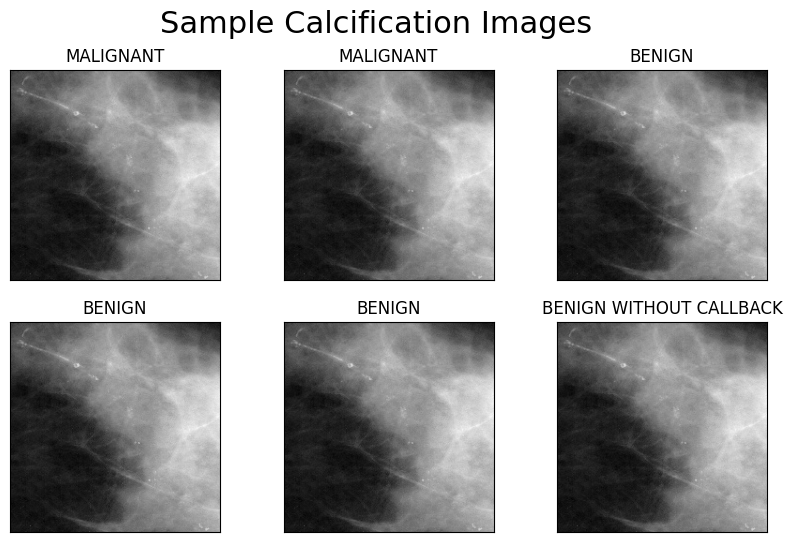

In [4]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 6))
fig.suptitle("Sample Calcification Images", fontsize = 22)

img1 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\MALIGNANT\1-004.jpg", target_size = (224, 224))
img2 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\MALIGNANT\1-025.jpg", target_size = (224, 224))
img3 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\BENIGN\1-006.jpg", target_size = (224, 224))
img4 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\BENIGN\1-017.jpg", target_size = (224, 224))
img5 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\BENIGN\1-072.jpg", target_size = (224, 224))
img6 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\BENIGN_WITHOUT_CALLBACK\1-029.jpg", target_size = (224, 224))

axes[0, 0].imshow(img1)
axes[0, 0].title.set_text("MALIGNANT")
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])

axes[0, 1].imshow(img1)
axes[0, 1].title.set_text("MALIGNANT")
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

axes[0, 2].imshow(img1)
axes[0, 2].title.set_text("BENIGN")
axes[0, 2].set_xticks([])
axes[0, 2].set_yticks([])

axes[1, 0].imshow(img1)
axes[1, 0].title.set_text("BENIGN")
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

axes[1, 1].imshow(img1)
axes[1, 1].title.set_text("BENIGN")
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

axes[1, 2].imshow(img1)
axes[1, 2].title.set_text("BENIGN WITHOUT CALLBACK")
axes[1, 2].set_xticks([])
axes[1, 2].set_yticks([])

<b><font size = 5>Calcification Image Data Generators for Models 1, 2</b></font>

In [5]:
train_gen = image.ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)
test_gen = image.ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)

tr_generator = train_gen.flow_from_directory(calc_train, target_size = (224, 224),
                                             batch_size = 16, class_mode = 'categorical')

te_generator = test_gen.flow_from_directory(calc_test, target_size = (224, 224), 
                                            batch_size = 16, class_mode = 'categorical')

print(tr_generator.class_indices.keys())

Found 749 images belonging to 3 classes.
Found 301 images belonging to 3 classes.
dict_keys(['BENIGN', 'BENIGN_WITHOUT_CALLBACK', 'MALIGNANT'])


<b><font size = 5>MODEL 1: Resnet50 + Calcification</b></font>

Epoch 1/10


d:\VSC Workspace\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4978 - loss: 1.3029 - val_accuracy: 0.5714 - val_loss: 0.8658
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 47s 994ms/step - accuracy: 0.6115 - loss: 0.7804 - val_accuracy: 0.5482 - val_loss: 0.9428
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7057 - loss: 0.6228 - val_accuracy: 0.5449 - val_loss: 0.8920
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7014 - loss: 0.6067 - val_accuracy: 0.5714 - val_loss: 0.8014
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7523 - loss: 0.5112 - val_accuracy: 0.5581 - val_loss: 0.8471
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8144 - loss: 0.4348 - val_accuracy: 0.5714 - val_loss: 0.9232
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7939 - loss: 0.4331 - val_accuracy: 0.5548 - val_loss: 0.9111
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8290 - loss: 0.3894 - val_accuracy: 0.5648 - val_loss: 0.9454


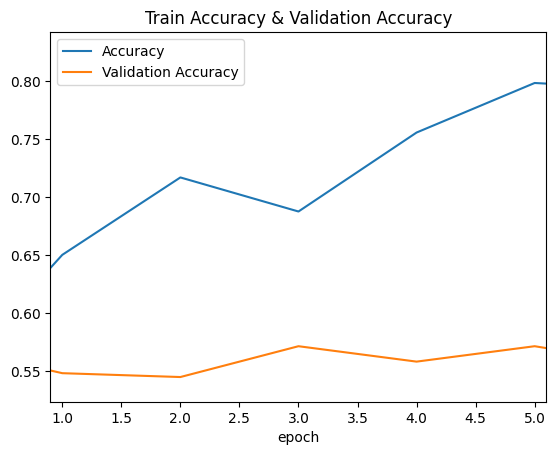

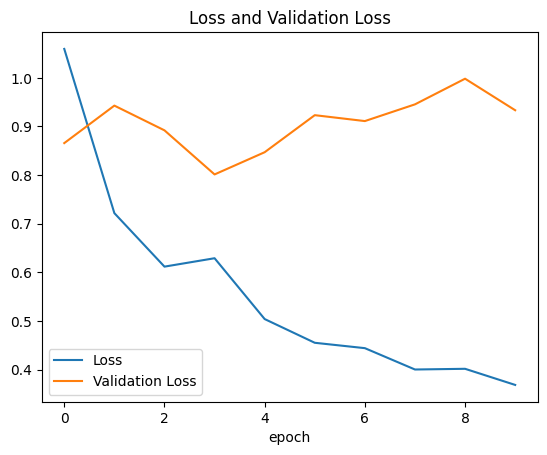

In [ ]:
from keras.applications import ResNet50
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout

from keras import Model
from keras import optimizers

base_model_resnet50 = ResNet50(weights = 'imagenet', include_top = False)

x = base_model_resnet50.output

x = GlobalAveragePooling2D()(x)

x = Dropout(0.3)(x)

x = Dense(180, activation = 'relu')(x)
preds = Dense(3, activation = 'softmax')(x)

resnet50_model2 = Model(inputs=base_model_resnet50.input , outputs=preds)

for layer in base_model_resnet50.layers:
    layer.trainable=False

resnet50_model2.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

with tf.device("/device:GPU:0"):
    resnet50_retrained_hist = resnet50_model2.fit(tr_generator, epochs=10, shuffle=True, verbose=1, validation_data = te_generator)


"""Plotting of Model History"""

plt.plot(resnet50_retrained_hist.history['accuracy'])
plt.plot(resnet50_retrained_hist.history['val_accuracy'])

plt.title('Train Accuracy & Validation Accuracy')
plt.xlabel('epoch')
plt.xlim([0.9, 5.1])
plt.legend(['Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

plt.plot(resnet50_retrained_hist.history['loss'])
plt.plot(resnet50_retrained_hist.history['val_loss'])
plt.title('Loss and Validation Loss')
plt.xlabel('epoch')
#plt.xlim([0.9, 5.1])
plt.legend(['Loss', 'Validation Loss'], loc='best')
plt.show()

<b><font size = 5>MODEL 1 Sample Results</b></font>

In [7]:
from keras.applications import resnet50

prediction_labels = list(te_generator.class_indices.keys())

benign_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\BENIGN\1-005.jpg', target_size = (224, 224))
bwc_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\BENIGN_WITHOUT_CALLBACK\1-170.jpg', target_size = (224, 224))
malignant_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\MALIGNANT\1-040.jpg', target_size = (224, 224))

benign_batch = np.expand_dims(benign_temp, axis = 0)
bwc_batch = np.expand_dims(bwc_temp, axis = 0)
malignant_batch = np.expand_dims(malignant_temp, axis = 0)

benign_processed = resnet50.preprocess_input(benign_batch.copy())
bwc_processed = resnet50.preprocess_input(bwc_batch.copy())
malignant_processed = resnet50.preprocess_input(malignant_batch.copy())

predictions1 = prediction_labels[np.argmax((resnet50_model2.predict(benign_processed)))]
predictions2 = prediction_labels[np.argmax((resnet50_model2.predict(bwc_processed)))]
predictions3 = prediction_labels[np.argmax((resnet50_model2.predict(malignant_processed)))]

print(f"Test 1       Predicted: {predictions1}       Actual: {"BENIGN"}")
print(f"Test 2       Predicted: {predictions2}       Actual: {"BENIGN_WITHOUT_CALLBACK"}")
print(f"Test 2       Predicted: {predictions3}       Actual: {"MALIGNANT"}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Test 1       Predicted: MALIGNANT       Actual: BENIGN
Test 2       Predicted: BENIGN_WITHOUT_CALLBACK       Actual: BENIGN_WITHOUT_CALLBACK
Test 2       Predicted: BENIGN       Actual: MALIGNANT


<b><font size = 5>MODEL 2: Resnet101 + Calcification</b></font>

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.4935 - loss: 1.2025 - val_accuracy: 0.5183 - val_loss: 1.0238
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7023 - loss: 0.6781 - val_accuracy: 0.5482 - val_loss: 0.8421
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.7161 - loss: 0.6101 - val_accuracy: 0.5914 - val_loss: 0.8645
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7322 - loss: 0.5806 - val_accuracy: 0.5947 - val_loss: 0.9085
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7976 - loss: 0.4569 - val_accuracy: 0.5814 - val_loss: 0.8559
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7901 - loss: 0.4396 - val_accuracy: 0.5814 - val_loss: 0.9654
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7854 - loss: 0.4558 - val_accuracy: 0.5947 - val_loss: 0.8439
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.8450 - loss: 0.3954 - val_accuracy: 0.5482 - val_loss

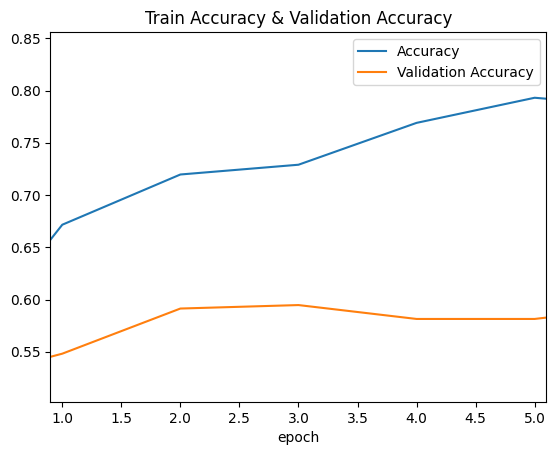

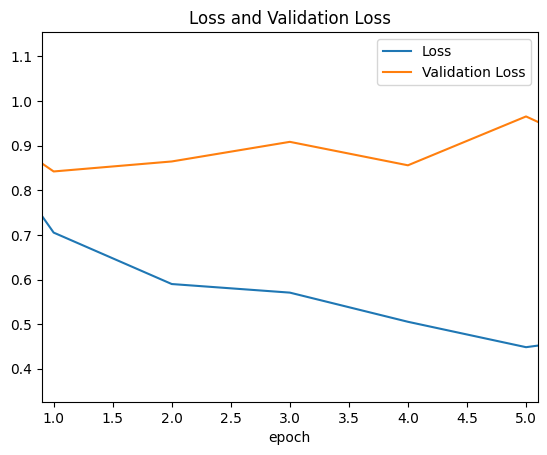

In [8]:
from keras.applications import ResNet101

base_model_resnet101 = ResNet101(weights = 'imagenet', include_top = False)

x = base_model_resnet101.output

x = GlobalAveragePooling2D()(x)

x = Dropout(0.3)(x)

x = Dense(180, activation = 'relu')(x)
preds = Dense(3, activation = 'softmax')(x)

resnet101_model2 = Model(inputs=base_model_resnet101.input , outputs=preds)

for layer in base_model_resnet101.layers:
    layer.trainable=False

resnet101_model2.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

with tf.device("/device:GPU:0"):
    resnet101_retrained_hist = resnet101_model2.fit(tr_generator, epochs=10, shuffle=True, verbose=1, validation_data = te_generator)


"""Plotting of Model History"""

plt.plot(resnet101_retrained_hist.history['accuracy'])
plt.plot(resnet101_retrained_hist.history['val_accuracy'])

plt.title('Train Accuracy & Validation Accuracy')
plt.xlabel('epoch')
plt.xlim([0.9, 5.1])
plt.legend(['Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

plt.plot(resnet101_retrained_hist.history['loss'])
plt.plot(resnet101_retrained_hist.history['val_loss'])
plt.title('Loss and Validation Loss')
plt.xlabel('epoch')
plt.xlim([0.9, 5.1])
plt.legend(['Loss', 'Validation Loss'], loc='best')
plt.show()

<b><font size = 5>MODEL 2 Sample Results</b></font>

In [9]:
prediction_labels = list(te_generator.class_indices.keys())

benign_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\BENIGN\1-005.jpg', target_size = (224, 224))
bwc_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\BENIGN_WITHOUT_CALLBACK\1-170.jpg', target_size = (224, 224))
malignant_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\calcification\test\cropped_files\MALIGNANT\1-040.jpg', target_size = (224, 224))

benign_batch = np.expand_dims(benign_temp, axis = 0)
bwc_batch = np.expand_dims(bwc_temp, axis = 0)
malignant_batch = np.expand_dims(malignant_temp, axis = 0)

benign_processed = resnet50.preprocess_input(benign_batch.copy())
bwc_processed = resnet50.preprocess_input(bwc_batch.copy())
malignant_processed = resnet50.preprocess_input(malignant_batch.copy())

predictions1 = prediction_labels[np.argmax((resnet101_model2.predict(benign_processed)))]
predictions2 = prediction_labels[np.argmax((resnet101_model2.predict(bwc_processed)))]
predictions3 = prediction_labels[np.argmax((resnet101_model2.predict(malignant_processed)))]

print(f"Test 1       Predicted: {predictions1}       Actual: {"BENIGN"}")
print(f"Test 2       Predicted: {predictions2}       Actual: {"BENIGN_WITHOUT_CALLBACK"}")
print(f"Test 2       Predicted: {predictions3}       Actual: {"MALIGNANT"}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Test 1       Predicted: BENIGN       Actual: BENIGN
Test 2       Predicted: BENIGN_WITHOUT_CALLBACK       Actual: BENIGN_WITHOUT_CALLBACK
Test 2       Predicted: BENIGN       Actual: MALIGNANT


[]

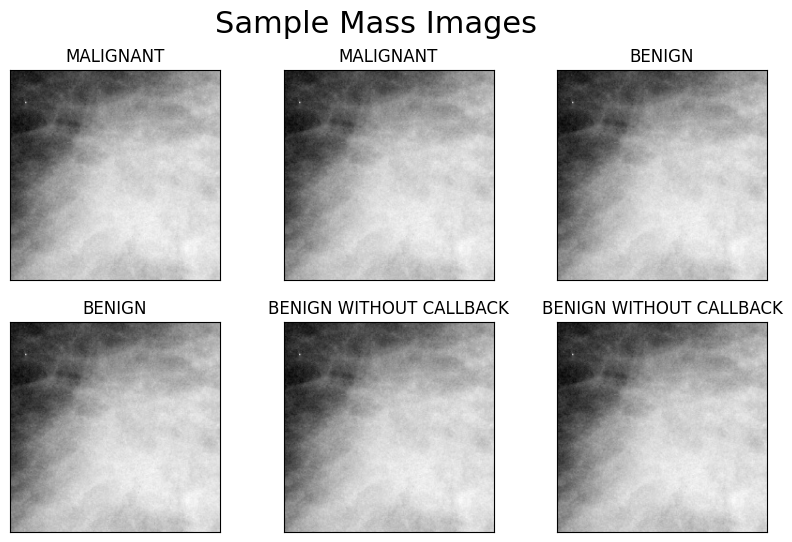

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 6))
fig.suptitle("Sample Mass Images", fontsize = 22)

img1 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass\train\cropped_files\MALIGNANT\1-002.jpg", target_size = (224, 224))
img2 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass\train\cropped_files\MALIGNANT\1-006.jpg", target_size = (224, 224))
img3 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass\train\cropped_files\BENIGN\1-003.jpg", target_size = (224, 224))
img4 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass\train\cropped_files\BENIGN\1-010.jpg", target_size = (224, 224))
img5 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass\test\cropped_files\BENIGN_WITHOUT_CALLBACK\1-023.jpg", target_size = (224, 224))
img6 = image.load_img(r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass\test\cropped_files\BENIGN_WITHOUT_CALLBACK\1-079.jpg", target_size = (224, 224))

axes[0, 0].imshow(img1)
axes[0, 0].title.set_text("MALIGNANT")
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])

axes[0, 1].imshow(img1)
axes[0, 1].title.set_text("MALIGNANT")
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

axes[0, 2].imshow(img1)
axes[0, 2].title.set_text("BENIGN")
axes[0, 2].set_xticks([])
axes[0, 2].set_yticks([])

axes[1, 0].imshow(img1)
axes[1, 0].title.set_text("BENIGN")
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

axes[1, 1].imshow(img1)
axes[1, 1].title.set_text("BENIGN WITHOUT CALLBACK")
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

axes[1, 2].imshow(img1)
axes[1, 2].title.set_text("BENIGN WITHOUT CALLBACK")
axes[1, 2].set_xticks([])
axes[1, 2].set_yticks([])

<b><font size = 5>Mass Image Data Generators for Models 3, 4</b></font>

In [11]:
train_gen = image.ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)
test_gen = image.ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)

tr_generator = train_gen.flow_from_directory(mass_train, target_size = (224, 224),
                                             batch_size = 16, class_mode = 'categorical')

te_generator = test_gen.flow_from_directory(mass_test, target_size = (224, 224), 
                                            batch_size = 16, class_mode = 'categorical')

print(tr_generator.class_indices.keys())

Found 626 images belonging to 3 classes.
Found 339 images belonging to 3 classes.
dict_keys(['BENIGN', 'BENIGN_WITHOUT_CALLBACK', 'MALIGNANT'])


<b><font size = 5>MODEL 3: Resnet50 + Mass</b></font>

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.4751 - loss: 1.2794 - val_accuracy: 0.6018 - val_loss: 0.9397
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6503 - loss: 0.7987 - val_accuracy: 0.5516 - val_loss: 1.0117
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6731 - loss: 0.7311 - val_accuracy: 0.5634 - val_loss: 0.9852
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6734 - loss: 0.6967 - val_accuracy: 0.5900 - val_loss: 1.0141
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7478 - loss: 0.5857 - val_accuracy: 0.5457 - val_loss: 1.1041
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7559 - loss: 0.5690 - val_accuracy: 0.6106 - val_loss: 1.0599
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7597 - loss: 0.5709 - val_accuracy: 0.5546 - val_loss: 1.0740
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7766 - loss: 0.5406 - val_accuracy: 0.6224 - val_loss:

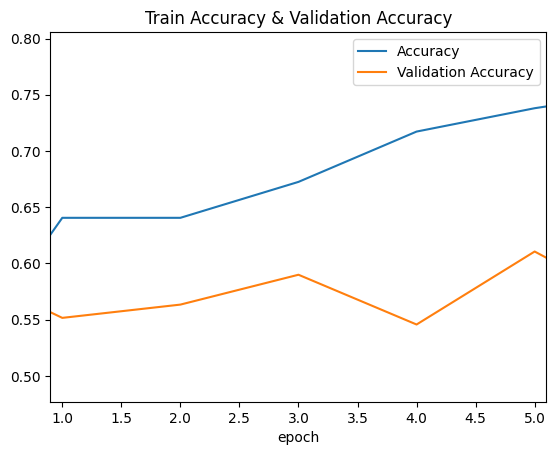

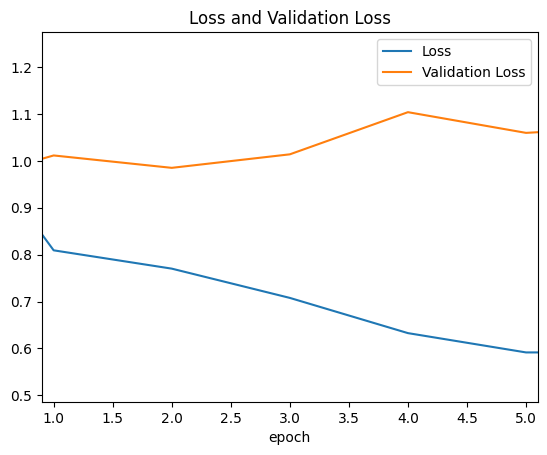

In [12]:
base_model_resnet50 = ResNet50(weights = 'imagenet', include_top = False)

x = base_model_resnet50.output

x = GlobalAveragePooling2D()(x)

x = Dropout(0.3)(x)

x = Dense(180, activation = 'relu')(x)
preds = Dense(3, activation = 'softmax')(x)

resnet50_model2 = Model(inputs=base_model_resnet50.input , outputs=preds)

for layer in base_model_resnet50.layers:
    layer.trainable=False

resnet50_model2.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

with tf.device("/device:GPU:0"):
    resnet50_retrained_hist = resnet50_model2.fit(tr_generator, epochs=10, shuffle=True, verbose=1, validation_data = te_generator)


"""Plotting of Model History"""

plt.plot(resnet50_retrained_hist.history['accuracy'])
plt.plot(resnet50_retrained_hist.history['val_accuracy'])

plt.title('Train Accuracy & Validation Accuracy')
plt.xlabel('epoch')
plt.xlim([0.9, 5.1])
plt.legend(['Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

plt.plot(resnet50_retrained_hist.history['loss'])
plt.plot(resnet50_retrained_hist.history['val_loss'])
plt.title('Loss and Validation Loss')
plt.xlabel('epoch')
plt.xlim([0.9, 5.1])
plt.legend(['Loss', 'Validation Loss'], loc='best')
plt.show()

<b><font size = 5>MODEL 3 Sample Results</b></font>

In [13]:
prediction_labels = list(te_generator.class_indices.keys())

benign_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\mass\test\cropped_files\BENIGN\1-016.jpg', target_size = (224, 224))
bwc_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\mass\test\cropped_files\BENIGN_WITHOUT_CALLBACK\1-048.jpg', target_size = (224, 224))
malignant_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\mass\test\cropped_files\MALIGNANT\1-046.jpg', target_size = (224, 224))

benign_batch = np.expand_dims(benign_temp, axis = 0)
bwc_batch = np.expand_dims(bwc_temp, axis = 0)
malignant_batch = np.expand_dims(malignant_temp, axis = 0)

benign_processed = resnet50.preprocess_input(benign_batch.copy())
bwc_processed = resnet50.preprocess_input(bwc_batch.copy())
malignant_processed = resnet50.preprocess_input(malignant_batch.copy())

predictions1 = prediction_labels[np.argmax((resnet50_model2.predict(benign_processed)))]
predictions2 = prediction_labels[np.argmax((resnet50_model2.predict(bwc_processed)))]
predictions3 = prediction_labels[np.argmax((resnet50_model2.predict(malignant_processed)))]

print(f"Test 1       Predicted: {predictions1}       Actual: {"BENIGN"}")
print(f"Test 2       Predicted: {predictions2}       Actual: {"BENIGN_WITHOUT_CALLBACK"}")
print(f"Test 2       Predicted: {predictions3}       Actual: {"MALIGNANT"}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Test 1       Predicted: BENIGN_WITHOUT_CALLBACK       Actual: BENIGN
Test 2       Predicted: BENIGN       Actual: BENIGN_WITHOUT_CALLBACK
Test 2       Predicted: MALIGNANT       Actual: MALIGNANT


<b><font size = 5>MODEL 4: Resnet101 + Mass</b></font>

In [14]:
base_model_resnet101 = ResNet101(weights = 'imagenet', include_top = False)

x = base_model_resnet101.output

x = GlobalAveragePooling2D()(x)

x = Dropout(0.3)(x)

x = Dense(180, activation = 'relu')(x)
preds = Dense(3, activation = 'softmax')(x)

resnet101_model2 = Model(inputs=base_model_resnet101.input , outputs=preds)

for layer in base_model_resnet101.layers:
    layer.trainable=False

resnet101_model2.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

with tf.device("/device:GPU:0"):
    resnet101_retrained_hist = resnet101_model2.fit(tr_generator, epochs=10, shuffle=True, verbose=1, validation_data = te_generator)


"""Plotting of Model History"""

plt.plot(resnet101_retrained_hist.history['accuracy'])
plt.plot(resnet101_retrained_hist.history['val_accuracy'])

plt.title('Train Accuracy & Validation Accuracy')
plt.xlabel('epoch')
plt.xlim([0.9, 5.1])
plt.legend(['Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

plt.plot(resnet101_retrained_hist.history['loss'])
plt.plot(resnet101_retrained_hist.history['val_loss'])
plt.title('Loss and Validation Loss')
plt.xlabel('epoch')
plt.xlim([0.9, 5.1])
plt.legend(['Loss', 'Validation Loss'], loc='best')
plt.show()

Epoch 1/10


KeyboardInterrupt: 

<b><font size = 5>MODEL 4 Sample Summary</b></font>

In [25]:
prediction_labels = list(te_generator.class_indices.keys())

benign_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\mass\test\cropped_files\BENIGN\1-016.jpg', target_size = (224, 224))
bwc_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\mass\test\cropped_files\BENIGN_WITHOUT_CALLBACK\1-048.jpg', target_size = (224, 224))
malignant_temp = image.load_img(r'D:\VSC Workspace\breast_cancer_CNN\dataset\mass\test\cropped_files\MALIGNANT\1-046.jpg', target_size = (224, 224))

benign_batch = np.expand_dims(benign_temp, axis = 0)
bwc_batch = np.expand_dims(bwc_temp, axis = 0)
malignant_batch = np.expand_dims(malignant_temp, axis = 0)

benign_processed = resnet50.preprocess_input(benign_batch.copy())
bwc_processed = resnet50.preprocess_input(bwc_batch.copy())
malignant_processed = resnet50.preprocess_input(malignant_batch.copy())

predictions1 = prediction_labels[np.argmax((resnet101_model2.predict(benign_processed)))]
predictions2 = prediction_labels[np.argmax((resnet101_model2.predict(bwc_processed)))]
predictions3 = prediction_labels[np.argmax((resnet101_model2.predict(malignant_processed)))]

print(f"Test 1       Predicted: {predictions1}       Actual: {"BENIGN"}")
print(f"Test 2       Predicted: {predictions2}       Actual: {"BENIGN_WITHOUT_CALLBACK"}")
print(f"Test 2       Predicted: {predictions3}       Actual: {"MALIGNANT"}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Test 1       Predicted: MALIGNANT       Actual: BENIGN
Test 2       Predicted: MALIGNANT       Actual: BENIGN_WITHOUT_CALLBACK
Test 2       Predicted: BENIGN       Actual: MALIGNANT


<b><font size = 5>Calc Image Data Generators for Models 5</b></font>

In [ ]:
from keras.applications.vgg16 import preprocess_input

tr_datagen = image.ImageDataGenerator(

    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True,
    preprocessing_function = preprocess_input

)

va_datagen = image.ImageDataGenerator(rescale = 1./255, 
                                        preprocessing_function = preprocess_input)

tr_generator = tr_datagen.flow_from_directory(calc_train, target_size = [224, 224], batch_size = 16, class_mode = 'categorical')

va_generator = va_datagen.flow_from_directory(calc_test, target_size = [224, 224], batch_size = 16, class_mode = 'categorical')

print(tr_generator.class_indices)

Found 749 images belonging to 3 classes.
Found 301 images belonging to 3 classes.
{'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 1, 'MALIGNANT': 2}


<b><font size = 5>MODEL 5: VGG16 + Calcification</b></font>

In [20]:
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16

image_size = [224, 224]

vgg_model = VGG16(input_shape = [224, 224, 3], weights = 'imagenet', include_top = False)

for layer in vgg_model.layers:

    layer.trainable = False

x = Flatten()(vgg_model.output)
x = Dense(128, activation = 'relu')(x)
x = Dense(3, activation = 'softmax')(x)

model = Model(inputs = vgg_model.input, outputs = x)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(tr_generator, epochs = 10, validation_data = va_generator)

Epoch 1/10


d:\VSC Workspace\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 502s 11s/step - accuracy: 0.3626 - loss: 3.8795 - val_accuracy: 0.4020 - val_loss: 1.0869
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 495s 11s/step - accuracy: 0.3579 - loss: 1.1001 - val_accuracy: 0.3887 - val_loss: 1.0976
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 494s 11s/step - accuracy: 0.3507 - loss: 1.0983 - val_accuracy: 0.3887 - val_loss: 1.0958
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 490s 10s/step - accuracy: 0.3609 - loss: 1.0975 - val_accuracy: 0.3887 - val_loss: 1.0934
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 488s 10s/step - accuracy: 0.3613 - loss: 1.0975 - val_accuracy: 0.3887 - val_loss: 1.0927
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 490s 10s/step - accuracy: 0.3289 - loss: 1.0985 - val_accuracy: 0.3887 - val_loss: 1.0921
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 486s 10s/step - accuracy: 0.3582 - loss: 1.0968 - val_accuracy: 0.3887 - val_loss: 1.0908
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 492s 10s/step - accuracy: 0.3178 - loss: 1.0974 - val_accuracy: 0.3887 - val_

<b><font size = 5>MODEL 5 Sample Accuracy</b></font>

In [21]:
print('Training Accuracy = ' + str(history.history['acc']))
print('Validation Accuracy = ' + str(history.history['val_acc']))

KeyError: 'acc'

<b><font size = 5>Mass Image Data Generators for Model 6</b></font>

In [ ]:
tr_datagen = image.ImageDataGenerator(

    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True,
    preprocessing_function = preprocess_input

)

va_datagen = image.ImageDataGenerator(rescale = 1./255, 
                                        preprocessing_function = preprocess_input)

tr_generator = tr_datagen.flow_from_directory(mass_train, target_size = [224, 224], batch_size = 16, class_mode = 'categorical')

va_generator = va_datagen.flow_from_directory(mass_test, target_size = [224, 224], batch_size = 16, class_mode = 'categorical')

print(tr_generator.class_indices)

<b><font size = 5>MODEL 6: VGG16 + Mass</b></font>

In [ ]:
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16

image_size = [224, 224]

vgg_model = VGG16(input_shape = [224, 224, 3], weights = 'imagenet', include_top = False)

for layer in vgg_model.layers:

    layer.trainable = False

x = Flatten()(vgg_model.output)
x = Dense(128, activation = 'relu')(x)
x = Dense(3, activation = 'softmax')(x)

model = Model(inputs = vgg_model.input, outputs = x)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(tr_generator, epochs = 10, validation_data = va_generator)

<b><font size = 5>MODEL 6 Sample Accuracy</b></font>

In [ ]:
print('Training Accuracy = ' + str(history.history['acc']))
print('Validation Accuracy = ' + str(history.history['val_acc']))